In [1]:
from typing import Optional, List, Dict, Union

import numpy as np
import pandas as pd

from IPython.display import display, HTML

from matplotlib import pyplot as plt

from tqdm.notebook import tqdm_notebook as tqdm

from notebook_utils.constants import PROJ_ROOT, NEW_GENRES, GENRE_COMBS, scale
from notebook_utils.predictions import Predictor
from notebook_utils.utils import display_df, setup_axis, process_and_scale, create_cmap
from notebook_utils.feature_reduction import FeatureReducer

%load_ext autoreload
%autoreload 2

tqdm.pandas()

fr = FeatureReducer(ngrams=True, general=True, lexical=True)
p = Predictor(loader=fr.loader) 

c:\python37\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\python37\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Loading lexical data...
Scaling lexical...
Scaling lexicalG...
Scaling nonlexical...
Scaling nonlexicalG...


# Show Loaded Data

In [2]:
fr.loader.show_model_df("Unigram")

Book #,@Genre,first_1k,@Outcome
10368,Adventure_Stories,i was on a french steamer bound from havre to new york when i had a peculiar experience in the way o...,FAILURE
12190,Adventure_Stories,an introductory disaster early in the spring of the year 1884 the threemasted schooner castor from s...,FAILURE
13290,Adventure_Stories,editors note martin rattler was one of robert michael ballantynes early booksborn at edinburgh in 18...,FAILURE
...,...,...,...
29948,Short_Stories,experiment the first time machine gentlemen professor johnson proudly informed his two colleaguestru...,SUCCESSFUL
3815,Short_Stories,o henry afritechef of all delight of all delectables conglomerate that stay the starved brain and re...,SUCCESSFUL
8129,Short_Stories,preface poltarnees beholder of ocean blagdaross the madness of andelsprutz where the tides ebb and f...,SUCCESSFUL


In [3]:
fr.loader.show_model_df("Bigram")

Book #,@Genre,first_1k,@Outcome
10368,Adventure_Stories,i was on a french steamer bound from havre to new york when i had a peculiar experience in the way o...,FAILURE
12190,Adventure_Stories,an introductory disaster early in the spring of the year 1884 the threemasted schooner castor from s...,FAILURE
13290,Adventure_Stories,editors note martin rattler was one of robert michael ballantynes early booksborn at edinburgh in 18...,FAILURE
...,...,...,...
29948,Short_Stories,experiment the first time machine gentlemen professor johnson proudly informed his two colleaguestru...,SUCCESSFUL
3815,Short_Stories,o henry afritechef of all delight of all delectables conglomerate that stay the starved brain and re...,SUCCESSFUL
8129,Short_Stories,preface poltarnees beholder of ocean blagdaross the madness of andelsprutz where the tides ebb and f...,SUCCESSFUL


In [4]:
fr.loader.show_model_df("POS")

Book #,@Genre,VBD,IN,DT,...,ROOT,LS,ADD,META,@Outcome
10368,Adventure_Stories,0.341839,0.288571,0.292251,...,0.0,0.000000,0.0,0.0,FAILURE
12190,Adventure_Stories,0.331481,0.293392,0.415268,...,0.0,0.000000,0.0,0.0,FAILURE
13290,Adventure_Stories,0.314553,0.354935,0.473672,...,0.0,0.000000,0.0,0.0,FAILURE
15072,Adventure_Stories,0.208186,0.174560,0.221430,...,0.0,0.000000,0.0,0.0,FAILURE
18399,Adventure_Stories,0.198080,0.279921,0.379168,...,0.0,0.000000,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.084386,0.076858,0.114739,...,0.0,0.093333,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.208944,0.262904,0.394573,...,0.0,0.013333,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.006316,0.002411,0.000000,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.148560,0.206183,0.293401,...,0.0,0.000000,0.0,0.0,SUCCESSFUL


In [5]:
fr.loader.show_model_df("Lex")

Book #,@Genre,PRP -> i,DT -> a,JJ -> french,...,VB -> arleon,NN -> estabonn,VBP -> accrue,NN -> unforetold,@Outcome
10368,Adventure_Stories,0.830110,0.601103,0.138889,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.151934,0.610294,0.027778,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.194751,0.799632,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.321823,0.566176,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.256906,0.490809,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.040055,0.148897,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.168508,0.667279,0.138889,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.008287,0.000000,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.381215,0.573529,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL


In [6]:
fr.loader.show_model_df("LexG")

Book #,@Genre,ROOT -> PRP -> i,PP -> DT -> a,PP -> JJ -> french,...,NP -> NNS -> bouts,ROOT -> RB -> guardedly,ROOT -> NN -> unforetold,S -> VBP -> foretell,@Outcome
10368,Adventure_Stories,0.579832,0.348214,0.333333,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.155462,0.392857,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.142857,0.714286,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.201681,0.339286,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.243697,0.383929,0.000000,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.063025,0.080357,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.197479,0.607143,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.008403,0.026786,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.462185,0.357143,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL


In [7]:
fr.loader.show_model_df("Nonlex")

Book #,@Genre,NP -> PRP,NP -> DT JJ NN,NP -> NN,...,SQ -> PP VBZ NP ADVP VP,"S -> ADJP , SBAR : SINV .","X -> CC WRB DT NN VBD VBN CC DT NNS VBD RB , DT NN VBD RP IN PRP$ NN , CC VBG JJ NN , CC VBG IN DT NN IN PRP$ NN CC IN PDT PRP$ NNS IN PRP , VBN IN DT NN , VBG , '' VBD . '' CC DT NN VBD RB , VBG PRP$ JJ NN , CC VBD RB : `` EX VBP JJ NNS , '' PRP VBD , `` IN DT NNS IN NN WDT VBP VBN RB IN DT NN POS NNS , CC JJ JJR VBP JJ IN PRP WDT VBD JJR VBN IN DT : RB PRP VBP DT VBZ JJR NN , CC DT NNS WDT PRP MD RB VB IN NN IN NNS IN NN .",S -> CC S : SBAR . '' ADVP S : S .,@Outcome
10368,Adventure_Stories,0.996599,0.551570,0.632750,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.887755,0.612108,0.675676,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.793651,0.654709,0.828299,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.890023,0.336323,0.809221,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.780045,0.576233,0.597774,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.244898,0.183857,0.227345,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.675737,0.582960,0.615262,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.018141,0.000000,0.000000,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.798186,0.421525,0.511924,...,0.0,0.0,0.0,0.0,SUCCESSFUL


In [8]:
fr.loader.show_model_df("NonlexG")

Book #,@Genre,ROOT -> NP -> PRP,PP -> NP -> DT JJ NN,PP -> NP -> NN,...,VP -> SQ -> PP VBZ NP ADVP VP,"ROOT -> S -> ADJP , SBAR : SINV .","ROOT -> X -> CC WRB DT NN VBD VBN CC DT NNS VBD RB , DT NN VBD RP IN PRP$ NN , CC VBG JJ NN , CC VBG IN DT NN IN PRP$ NN CC IN PDT PRP$ NNS IN PRP , VBN IN DT NN , VBG , '' VBD . '' CC DT NN VBD RB , VBG PRP$ JJ NN , CC VBD RB : `` EX VBP JJ NNS , '' PRP VBD , `` IN DT NNS IN NN WDT VBP VBN RB IN DT NN POS NNS , CC JJ JJR VBP JJ IN PRP WDT VBD JJR VBN IN DT : RB PRP VBP DT VBZ JJR NN , CC DT NNS WDT PRP MD RB VB IN NN IN NNS IN NN .",ROOT -> S -> CC S : SBAR . '' ADVP S : S .,@Outcome
10368,Adventure_Stories,0.629371,0.435644,0.47,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.585082,0.554455,0.42,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.396270,0.485149,0.34,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.421911,0.178218,0.31,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.459207,0.366337,0.28,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.179487,0.158416,0.15,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.540793,0.534653,0.41,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.032634,0.009901,0.00,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.650350,0.277228,0.27,...,0.0,0.0,0.0,0.0,SUCCESSFUL


In [9]:
fr.loader.show_model_df("Phrasal")

Book #,@Genre,NP,VP,PP,...,LST,WHADJP,X,RRC,@Outcome
10368,Adventure_Stories,0.729850,0.830390,0.552301,...,0.006757,0.102564,0.166667,0.000000,FAILURE
12190,Adventure_Stories,0.685774,0.810549,0.558229,...,0.000000,0.051282,0.000000,0.142857,FAILURE
13290,Adventure_Stories,0.738393,0.684975,0.609833,...,0.000000,0.076923,0.166667,0.071429,FAILURE
15072,Adventure_Stories,0.539681,0.625212,0.349024,...,0.006757,0.102564,0.333333,0.000000,FAILURE
18399,Adventure_Stories,0.608518,0.676990,0.541492,...,0.013514,0.128205,0.000000,0.071429,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.201808,0.207597,0.161437,...,0.054054,0.000000,0.166667,0.071429,SUCCESSFUL
2777,Short_Stories,0.649870,0.538108,0.576360,...,0.006757,0.076923,0.000000,0.142857,SUCCESSFUL
29948,Short_Stories,0.005076,0.006049,0.004184,...,0.000000,0.000000,0.000000,0.000000,SUCCESSFUL
3815,Short_Stories,0.567166,0.497459,0.429568,...,0.013514,0.025641,0.166667,0.071429,SUCCESSFUL


In [10]:
fr.loader.show_model_df("Roget")

Book #,@Genre,vehicle,ship,circumscription,...,numbness,analogy,zoology,inodorousness,@Outcome
10368,Adventure_Stories,0.273418,0.084699,0.391304,...,0.0,0.000000,0.0,0.0,FAILURE
12190,Adventure_Stories,0.508861,0.185792,0.086957,...,0.0,0.000000,0.0,0.0,FAILURE
13290,Adventure_Stories,0.526582,0.275956,0.173913,...,0.0,0.000000,0.0,0.0,FAILURE
15072,Adventure_Stories,0.453165,0.043716,0.000000,...,0.0,0.000000,0.0,0.0,FAILURE
18399,Adventure_Stories,0.308861,0.278689,0.086957,...,0.0,0.000000,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.101266,0.084699,0.043478,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.400000,0.224044,0.260870,...,0.0,0.034483,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.025316,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.367089,0.054645,0.217391,...,0.0,0.000000,0.0,0.0,SUCCESSFUL


In [11]:
fr.loader.show_model_df("WordNet")

Book #,@Genre,be,exist,equal,...,bromo-seltzer,sheeting,unrepaired,tax-exempt,@Outcome
10368,Adventure_Stories,0.397547,0.416203,0.394758,...,0.0,0.0,0.0,0.0,FAILURE
12190,Adventure_Stories,0.368411,0.367752,0.364972,...,0.0,0.0,0.0,0.0,FAILURE
13290,Adventure_Stories,0.326959,0.328435,0.325655,...,0.0,0.0,0.0,0.0,FAILURE
15072,Adventure_Stories,0.230889,0.229944,0.228356,...,0.0,0.0,0.0,0.0,FAILURE
18399,Adventure_Stories,0.271940,0.271644,0.270453,...,0.0,0.0,0.0,0.0,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.120100,0.126688,0.119539,...,0.0,0.0,0.0,0.0,SUCCESSFUL
2777,Short_Stories,0.222829,0.224782,0.222002,...,0.0,0.0,0.0,0.0,SUCCESSFUL
29948,Short_Stories,0.004856,0.005163,0.004766,...,0.0,0.0,0.0,0.0,SUCCESSFUL
3815,Short_Stories,0.180926,0.183082,0.178713,...,1.0,1.0,0.0,0.0,SUCCESSFUL


In [12]:
fr.loader.show_model_df("LIWC")

Book #,@Genre,future,i,past,...,relig,family,money,death,@Outcome
10368,Adventure_Stories,0.379189,0.407635,0.490017,...,0.153716,0.287879,0.256356,0.129310,FAILURE
12190,Adventure_Stories,0.307872,0.048424,0.368379,...,0.104730,0.050505,0.063559,0.088362,FAILURE
13290,Adventure_Stories,0.273188,0.079939,0.293595,...,0.138514,0.103535,0.239407,0.127155,FAILURE
15072,Adventure_Stories,0.274097,0.093262,0.301904,...,0.067568,0.333333,0.129237,0.023707,FAILURE
18399,Adventure_Stories,0.261756,0.106585,0.270167,...,0.432432,0.449495,0.266949,0.157328,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.066641,0.014348,0.083785,...,0.016892,0.002525,0.031780,0.038793,SUCCESSFUL
2777,Short_Stories,0.188101,0.050730,0.217888,...,0.065878,0.042929,0.256356,0.062500,SUCCESSFUL
29948,Short_Stories,0.005456,0.002306,0.005540,...,0.001689,0.000000,0.000000,0.004310,SUCCESSFUL
3815,Short_Stories,0.190699,0.130925,0.209925,...,0.060811,0.118687,0.273305,0.073276,SUCCESSFUL


In [13]:
fr.loader.show_model_df("NRC")

Book #,@Genre,anger,anticipation,disgust,...,positive,sadness,surprise,trust,@Outcome
10368,Adventure_Stories,0.167778,0.161198,0.158824,...,0.260686,0.247542,0.405537,0.310249,FAILURE
12190,Adventure_Stories,0.262222,0.117261,0.248529,...,0.233245,0.294906,0.366450,0.195014,FAILURE
13290,Adventure_Stories,0.485556,0.174037,0.442647,...,0.347757,0.447721,0.589577,0.459280,FAILURE
15072,Adventure_Stories,0.144444,0.123252,0.147059,...,0.218734,0.174263,0.302932,0.232133,FAILURE
18399,Adventure_Stories,0.350000,0.159486,0.377941,...,0.287335,0.291332,0.407166,0.393906,FAILURE
...,...,...,...,...,...,...,...,...,...,...
27462,Short_Stories,0.155556,0.032525,0.107353,...,0.068074,0.127793,0.087948,0.099169,SUCCESSFUL
2777,Short_Stories,0.218889,0.114408,0.192647,...,0.245646,0.234138,0.353420,0.322992,SUCCESSFUL
29948,Short_Stories,0.004444,0.000000,0.011765,...,0.000000,0.002681,0.000000,0.006648,SUCCESSFUL
3815,Short_Stories,0.310000,0.083595,0.263235,...,0.166491,0.180518,0.263844,0.226039,SUCCESSFUL


# Train Models

In [14]:
no_reduc_accs = []

### Unigram

In [15]:
unigram_acc, uni_weights = p.predict_success_all(fr.loader.unigram_df, "Unigram", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
Unigram,All,0.712013
Unigram,Average,0.712013


### Bigram

In [16]:
# bigram_acc, bigram_weights = p.predict_success_all(fr.loader.bigram_df, "Bigram", add_to_acc=no_reduc_accs, disp_weights=False)

### POS

In [17]:
pos_acc, pos_weights = p.predict_success_all(fr.loader.pos_df_scaled, "POS", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
POS,All,0.645148
POS,Average,0.645148


### Phrasal

In [18]:
phrasal_acc, phrasal_weights = p.predict_success_all(fr.loader.phrasal_df_scaled, "Phrasal", disp_weights=True)

Feature,Weight
QP,1.587220
PP,1.244538
PRT,0.997651
WHNP,0.932795
CONJP,0.748290
...,...
ADJP,-0.355375
WHADJP,-0.357670
INTJ,-0.539730
ADVP,-0.717027


Genre,Accuracy
All,0.594698
Average,0.594698


### $\Gamma$ (lexicalized production rules)

In [19]:
lex_acc, lex_weights = p.predict_success_all(fr.loader.lex_df_scaled, "$\Gamma$", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
$\Gamma$,All,0.773991
$\Gamma$,Average,0.773991


### $\Gamma^G$ (lexicalized production rules, prepended with grandparent node)

In [20]:
lexg_acc, lexg_weights = p.predict_success_all(fr.loader.lexg_df_scaled, "$\Gamma^G$", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
$\Gamma^G$,All,0.768967
$\Gamma^G$,Average,0.768967


### $\gamma$ (nonlexicalized production rules)

In [21]:
nonlex_acc, nonlex_weights = p.predict_success_all(fr.loader.nonlex_df_scaled, "$\gamma$", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
$\gamma$,All,0.670424
$\gamma$,Average,0.670424


### $\gamma^G$ (nonlexicalized production rules, prepended with grandparent node)

In [22]:
nonlexg_acc, nonlexg_weights = p.predict_success_all(fr.loader.nonlexg_df_scaled, "$\gamma^G$", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
$\gamma^G$,All,0.695709
$\gamma^G$,Average,0.695709


### Roget

In [23]:
roget_acc, roget_weights = p.predict_success_all(fr.loader.roget_df_scaled, "Roget", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
Roget,All,0.680519
Roget,Average,0.680519


### WordNet

In [24]:
wordnet_acc, wordnet_weights = p.predict_success_all(fr.loader.wordnet_df_scaled, "WordNet", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
WordNet,All,0.74873
WordNet,Average,0.74873


### LIWC

In [25]:
liwc_acc, liwc_weights = p.predict_success_all(fr.loader.liwc_df_scaled, "LIWC", add_to_acc=no_reduc_accs, disp_weights=False)

Model Name,Genre,Accuracy
LIWC,All,0.573187
LIWC,Average,0.573187


# Perform Feature Reduction

### Unigram

In [30]:
uni_exh, uni_rw = fr.reduce_features_all(uni_weights, "Unigram", og_acc=unigram_acc)

c:\python37\lib\site-packages\tqdm\std.py:668: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


Unigram exhausted at 49.0 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,9.0,0.838365,1048.0
Average,9.0,0.838365,1048.0


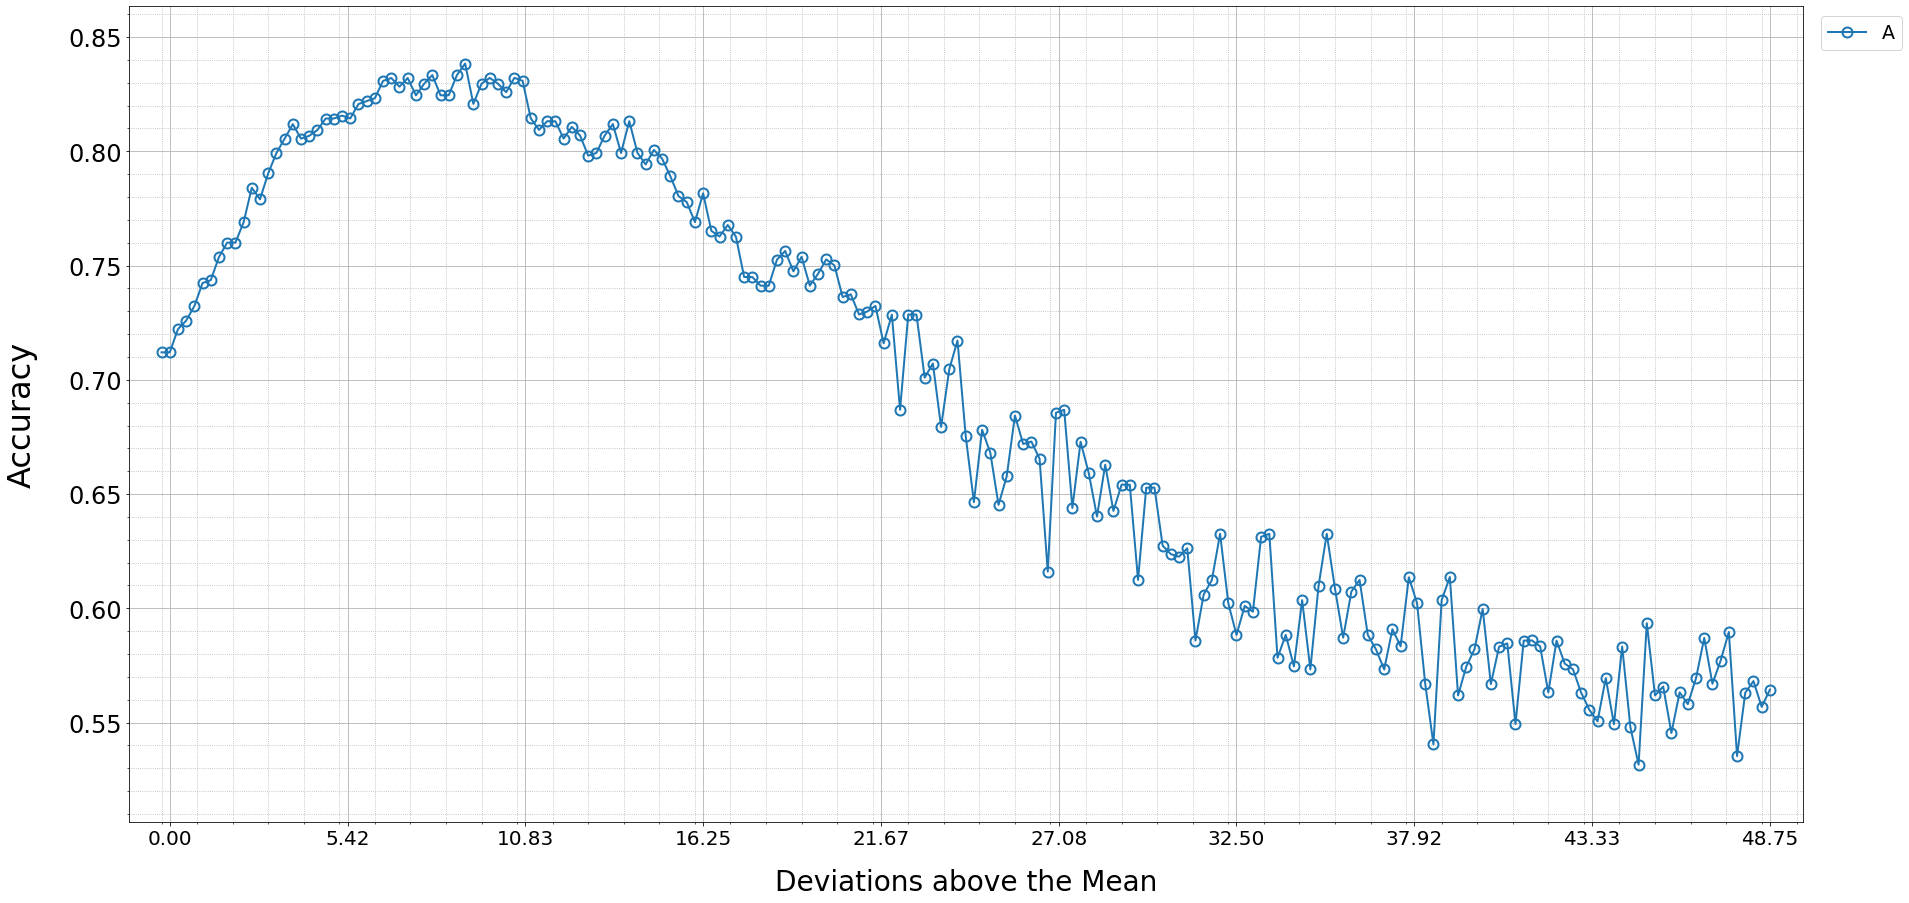

In [31]:
uni_reduced_acc = fr.plot_exhausted_all(uni_exh)

### Bigram

In [32]:
# bi_exh, bi_weights_reduced = fr.reduce_features_all(bigram_weights, "Bigram", og_acc=bigram_acc)

In [33]:
# bi_reduced_acc = fr.plot_exhausted_all(bi_exh)

### POS

In [34]:
pos_exh, pos_weights_reduced = fr.reduce_features_all(pos_weights, "POS", og_acc=pos_acc)

POS exhausted at 1.5 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,0.25,0.664063,32.0
Average,0.25,0.664063,32.0


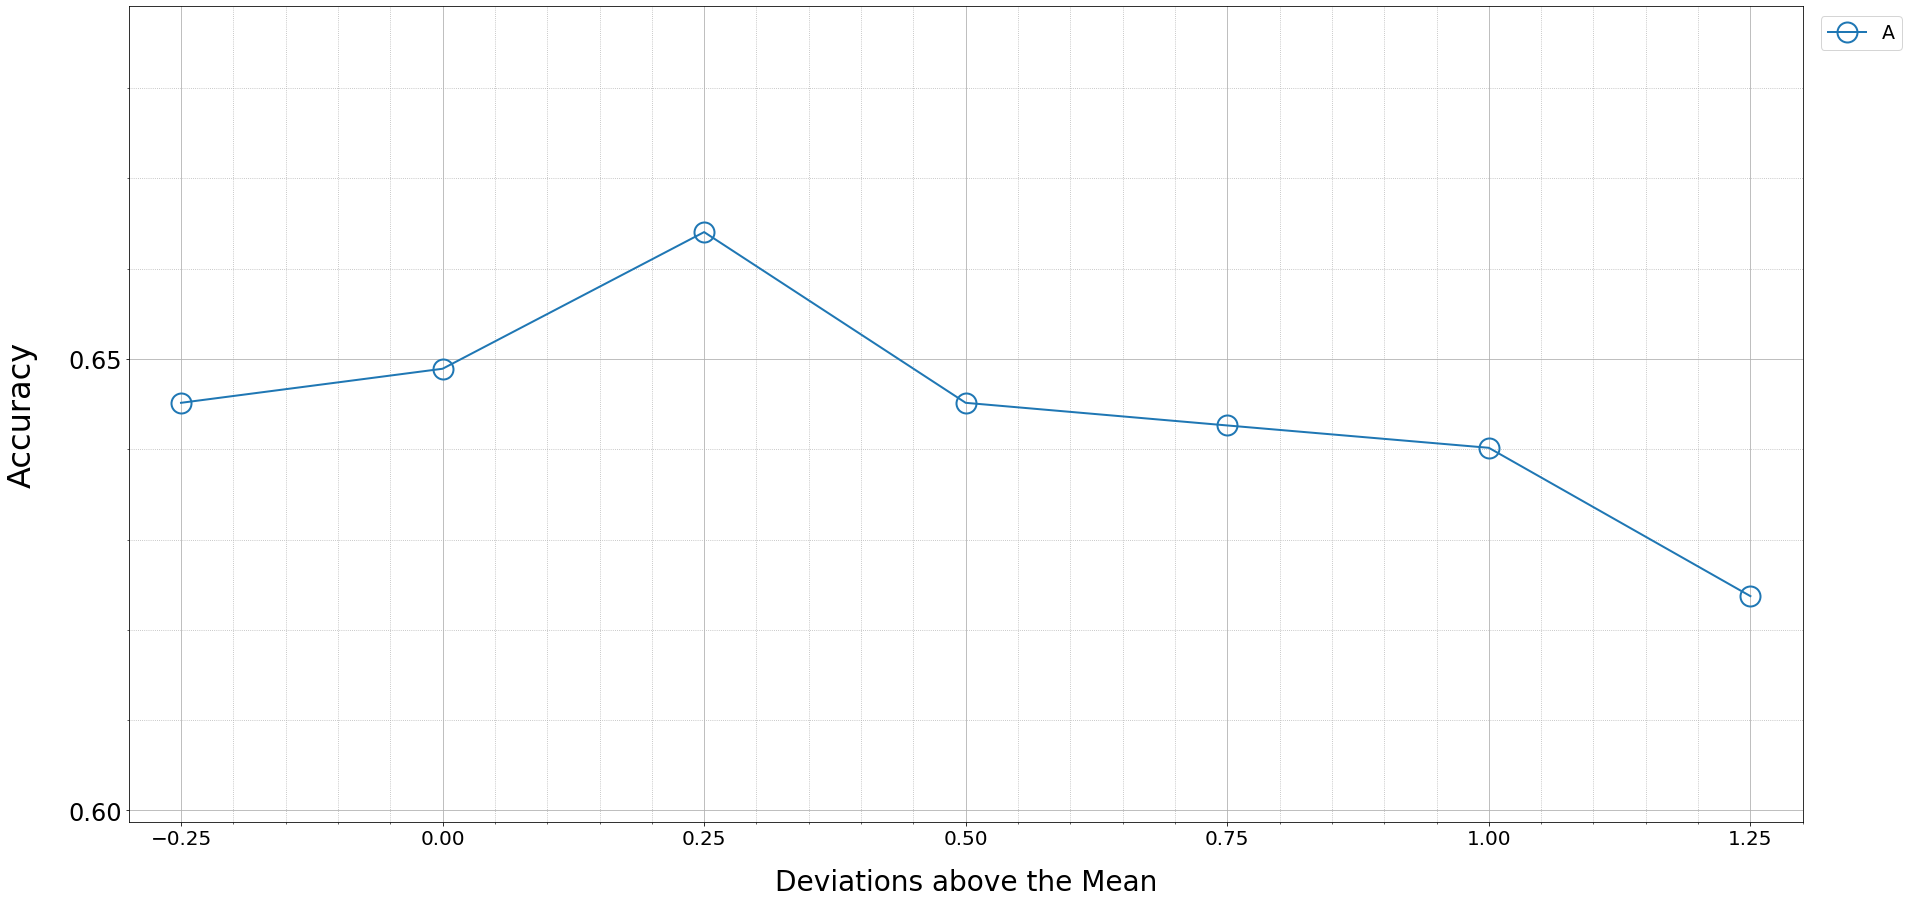

In [35]:
pos_reduced_acc = fr.plot_exhausted_all(pos_exh, markersize=20)

### Phrasal

In [36]:
phrasal_exh, phrasal_weights_reduced = fr.reduce_features_all(phrasal_weights, "Phrasal", og_acc=phrasal_acc)

Phrasal exhausted at 1.25 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,0.25,0.613622,11.0
Average,0.25,0.613622,11.0


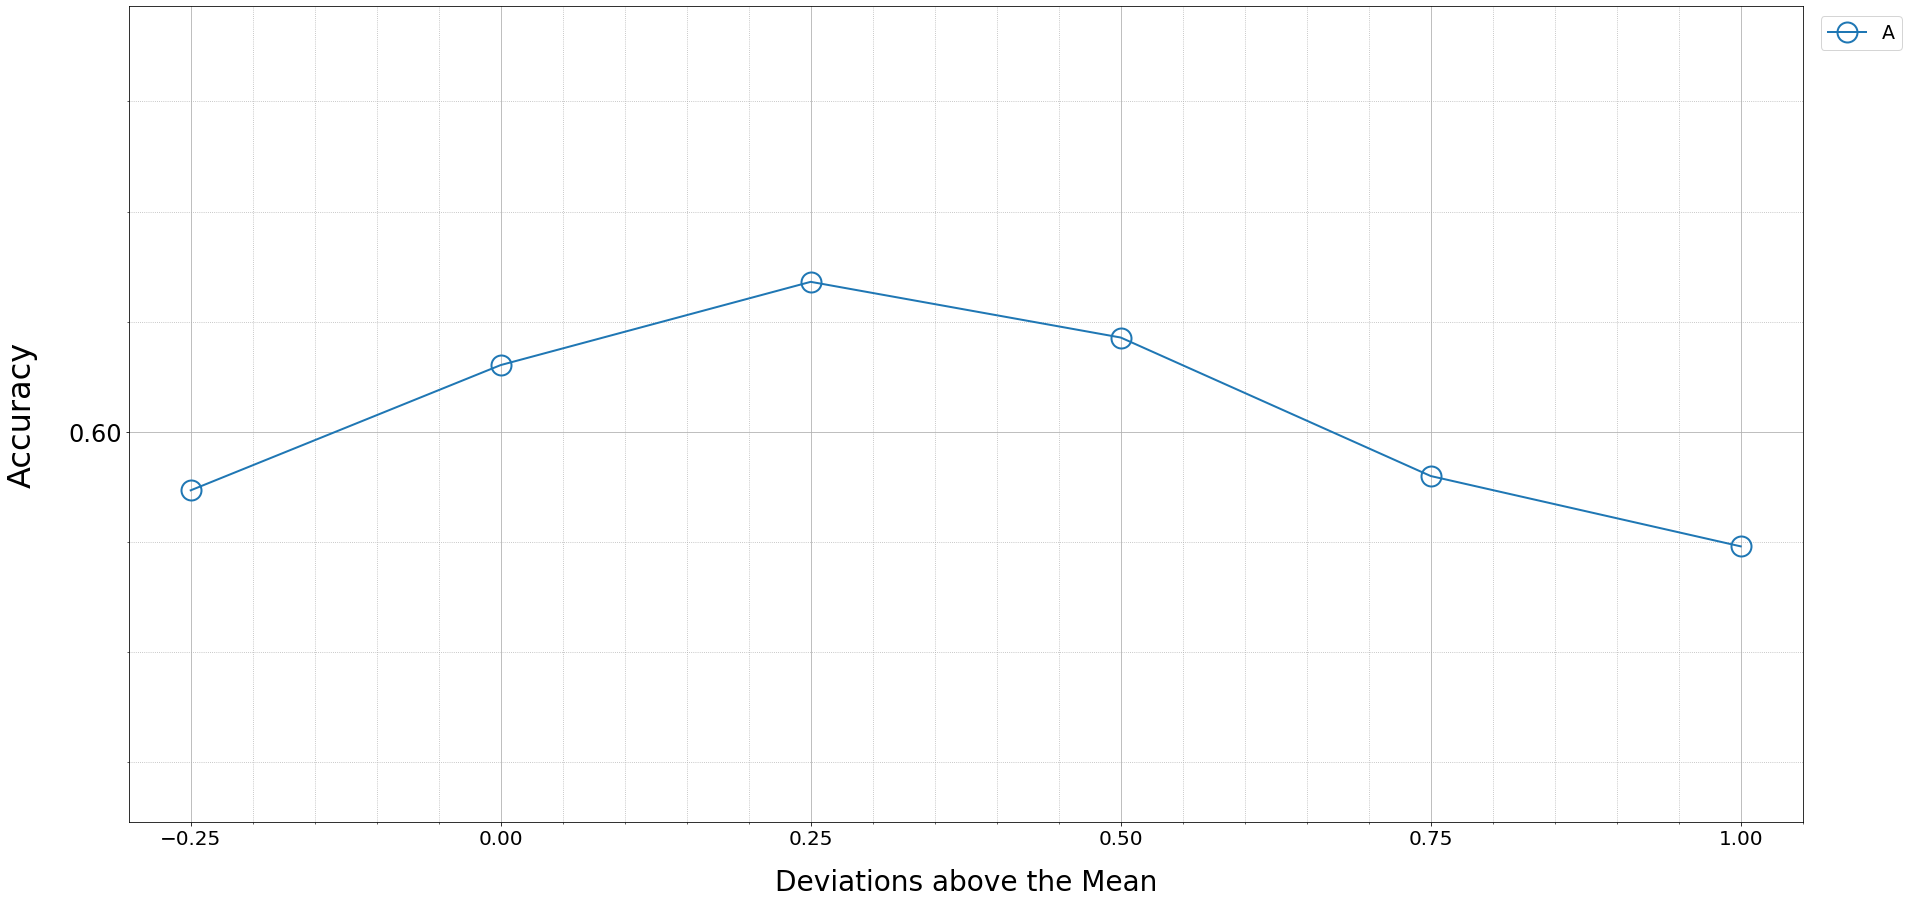

In [37]:
phrasal_reduced_acc = fr.plot_exhausted_all(phrasal_exh, markersize=20)

### $\Gamma$

In [38]:
lex_exh, lex_weights_reduced = fr.reduce_features_all(lex_weights, "lex", og_acc=lex_acc)

lex exhausted at 17.0 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,2.0,0.978521,7160.0
Average,2.0,0.978521,7160.0


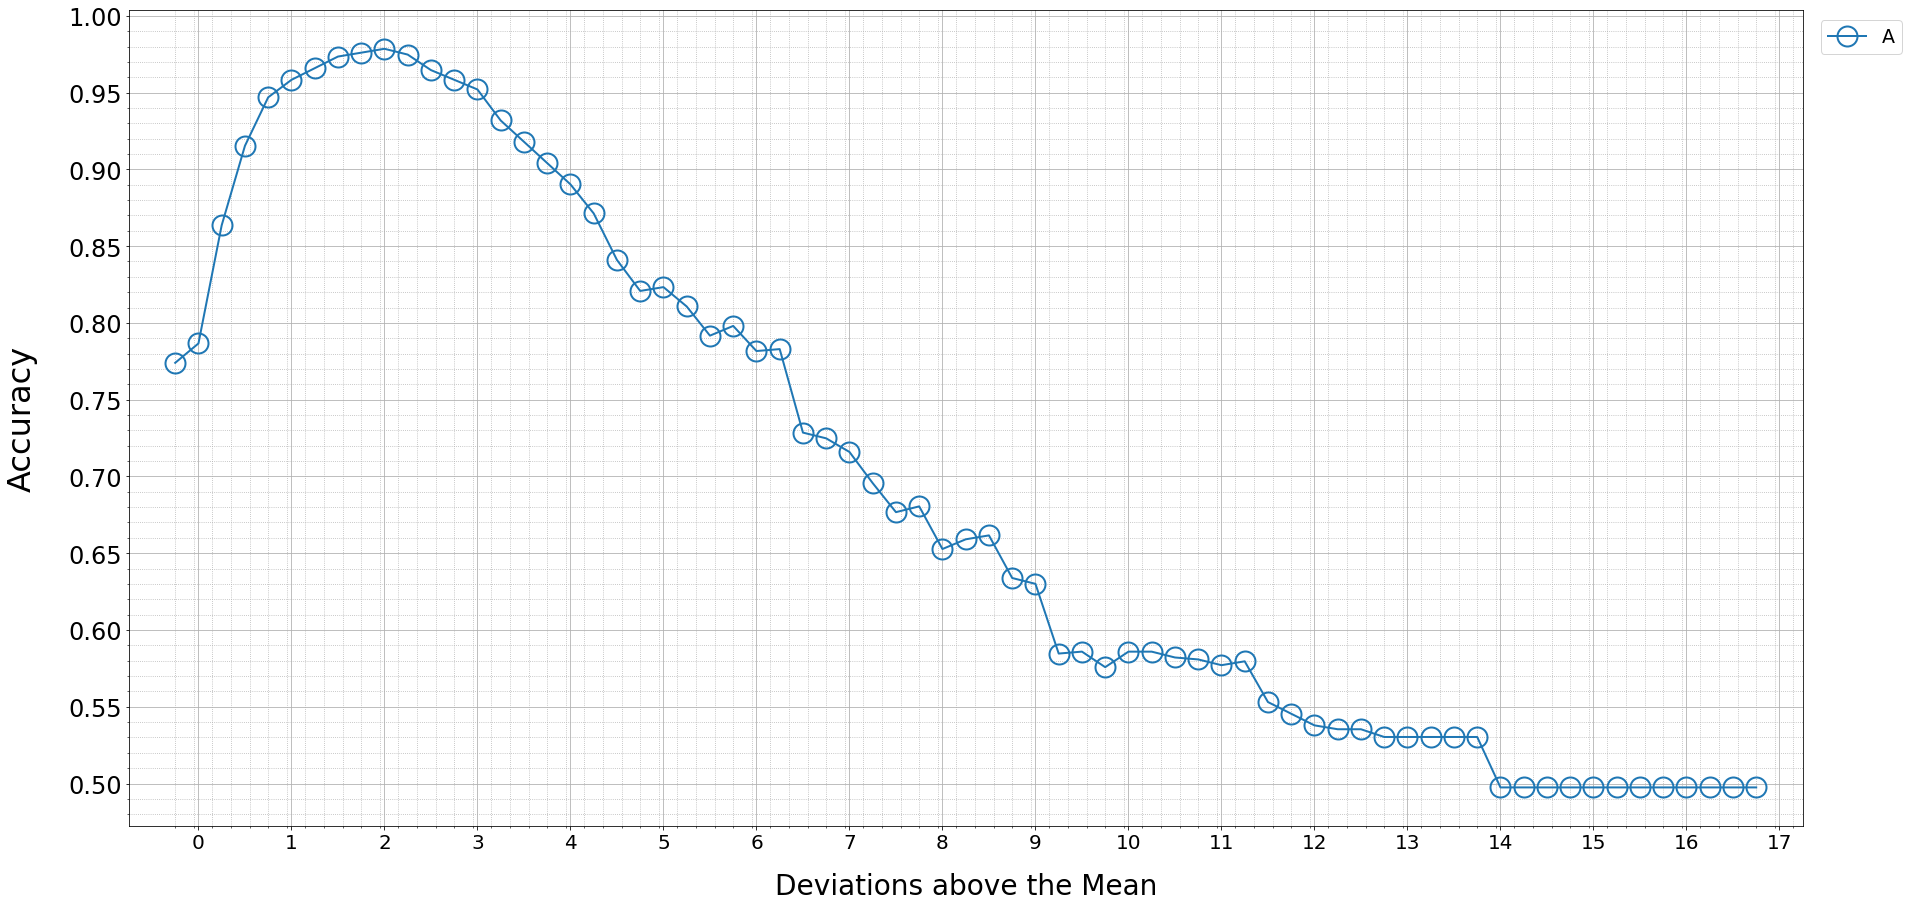

In [39]:
lex_reduced_acc = fr.plot_exhausted_all(lex_exh, markersize=20)

### $\Gamma^G$

In [40]:
lexg_exh, lexg_weights_reduced = fr.reduce_features_all(lexg_weights, "lexg", og_acc=lexg_acc)

lexg exhausted at 13.75 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,2.25,0.992421,17358.0
Average,2.25,0.992421,17358.0


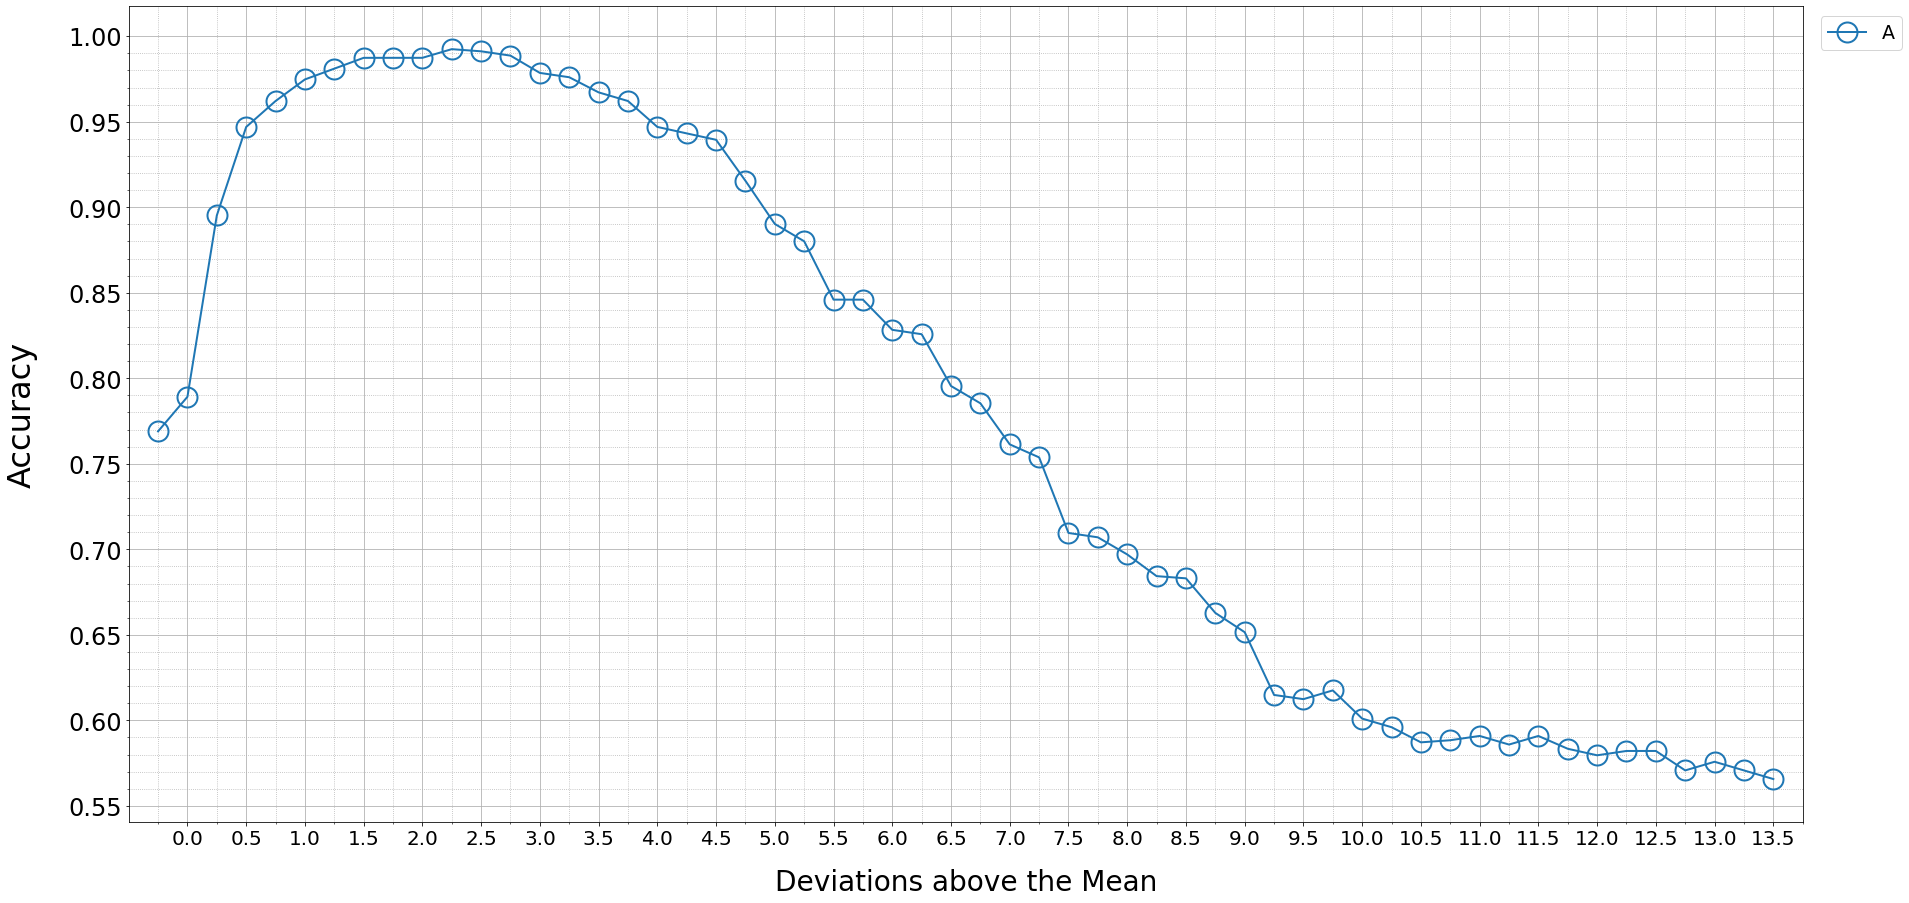

In [41]:
lexg_reduced_acc = fr.plot_exhausted_all(lexg_exh, markersize=20)

### $\gamma$

In [42]:
nonlex_exh, nonlex_weights_reduced = fr.reduce_features_all(nonlex_weights, "nonlex", og_acc=nonlex_acc)

nonlex exhausted at 16.0 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,2.0,0.960831,10241.0
Average,2.0,0.960831,10241.0


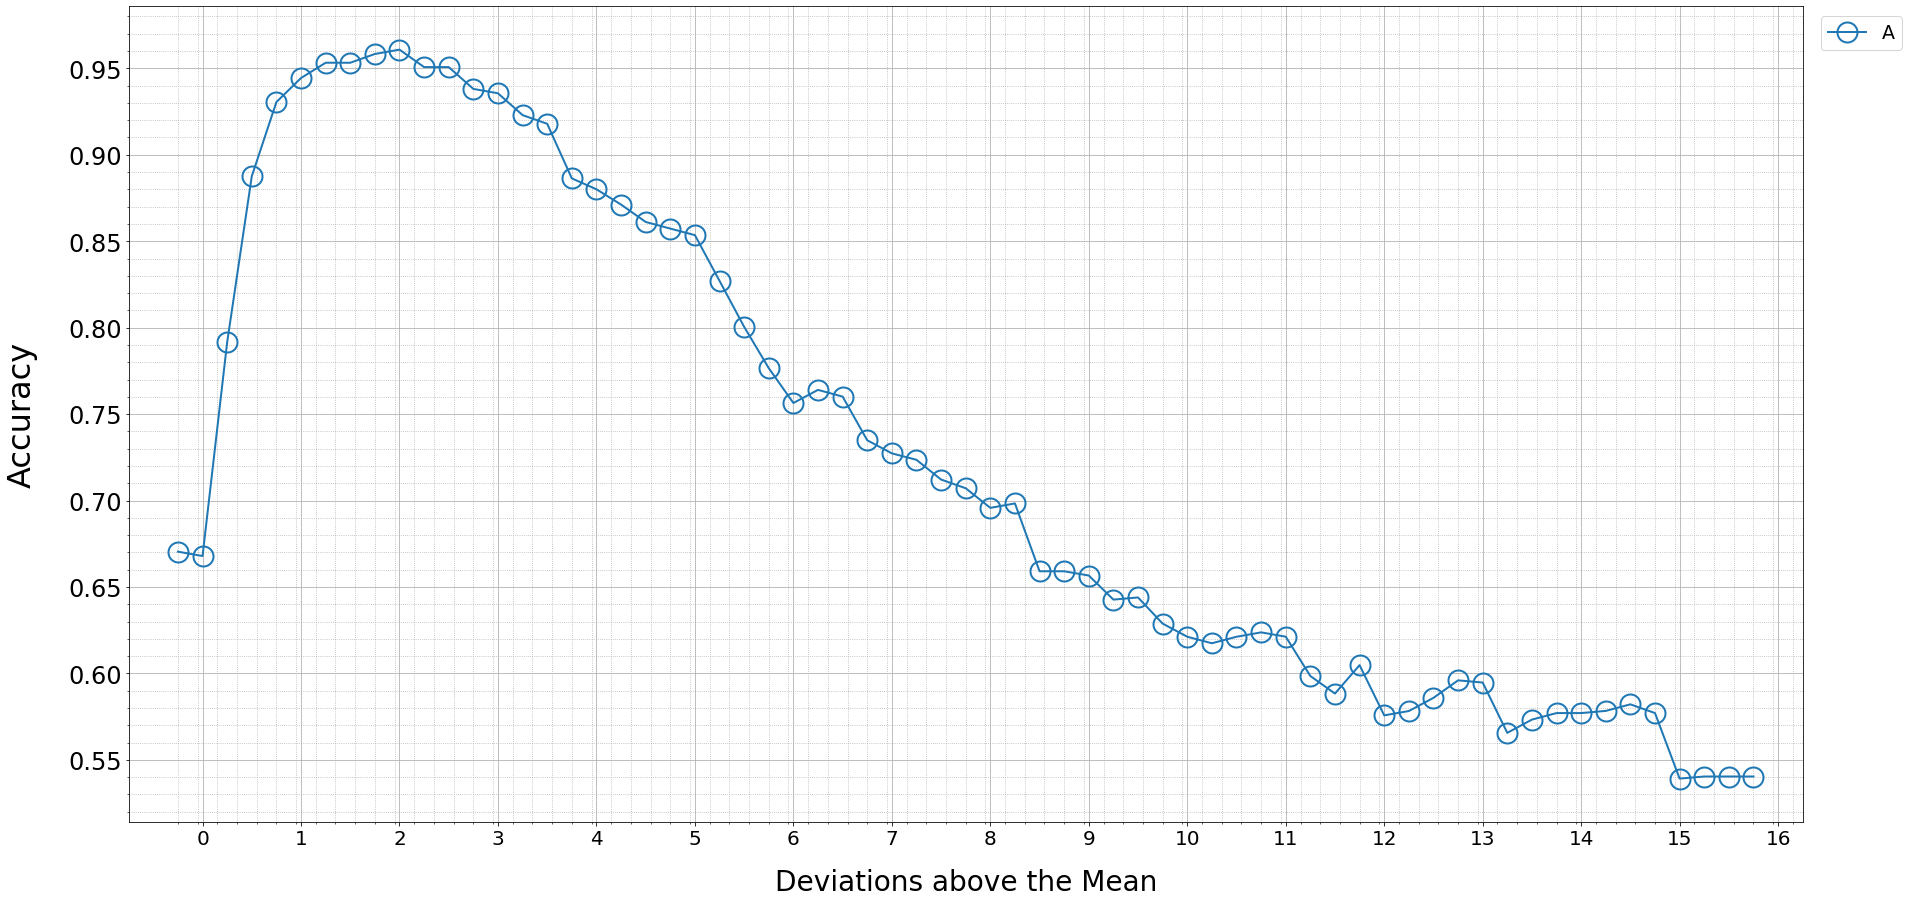

In [43]:
nonlex_reduced_acc = fr.plot_exhausted_all(nonlex_exh, markersize=20)

### $\gamma^G$

In [44]:
nonlexg_exh, nonlexg_weights_reduced = fr.reduce_features_all(nonlexg_weights, "nonlexg", og_acc=nonlexg_acc)

nonlexg exhausted at 16.5 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,1.75,0.979779,19308.0
Average,1.75,0.979779,19308.0


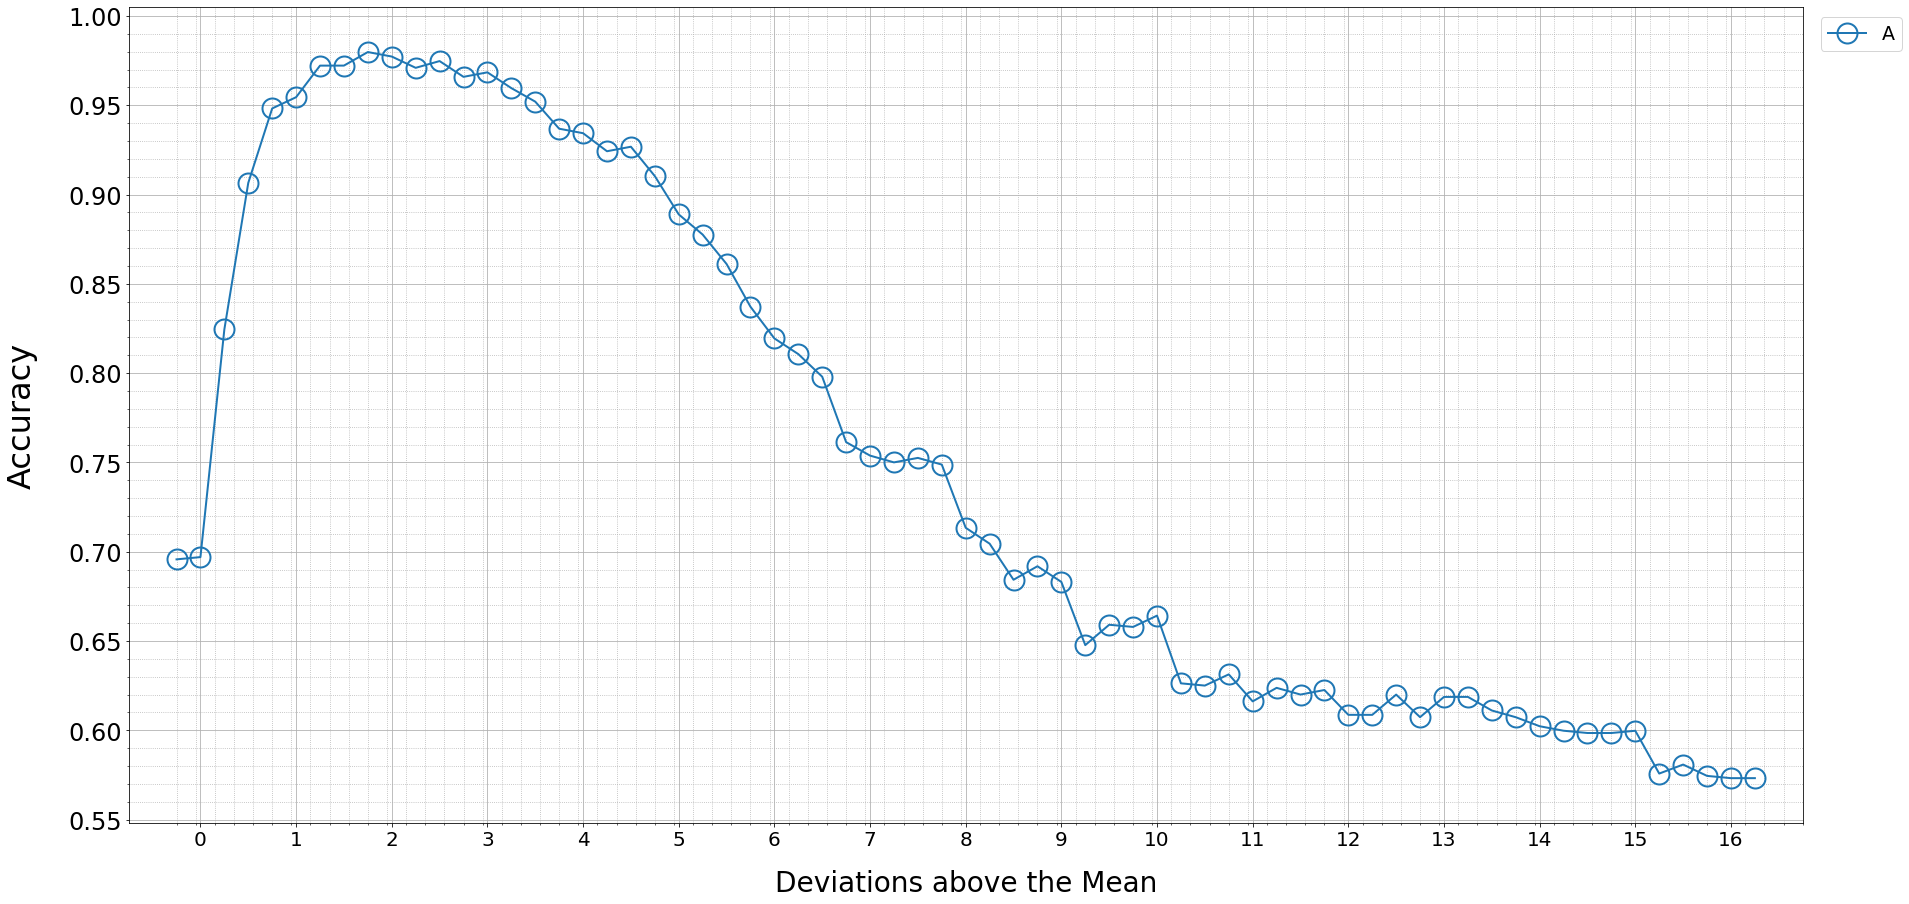

In [45]:
nonlexg_reduced_acc = fr.plot_exhausted_all(nonlexg_exh, markersize=20)

### Roget

In [46]:
roget_exh, roget_rw = fr.reduce_features_all(roget_weights, "Roget", og_acc=roget_acc)

Roget exhausted at 3.25 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,1.25,0.834528,196.0
Average,1.25,0.834528,196.0


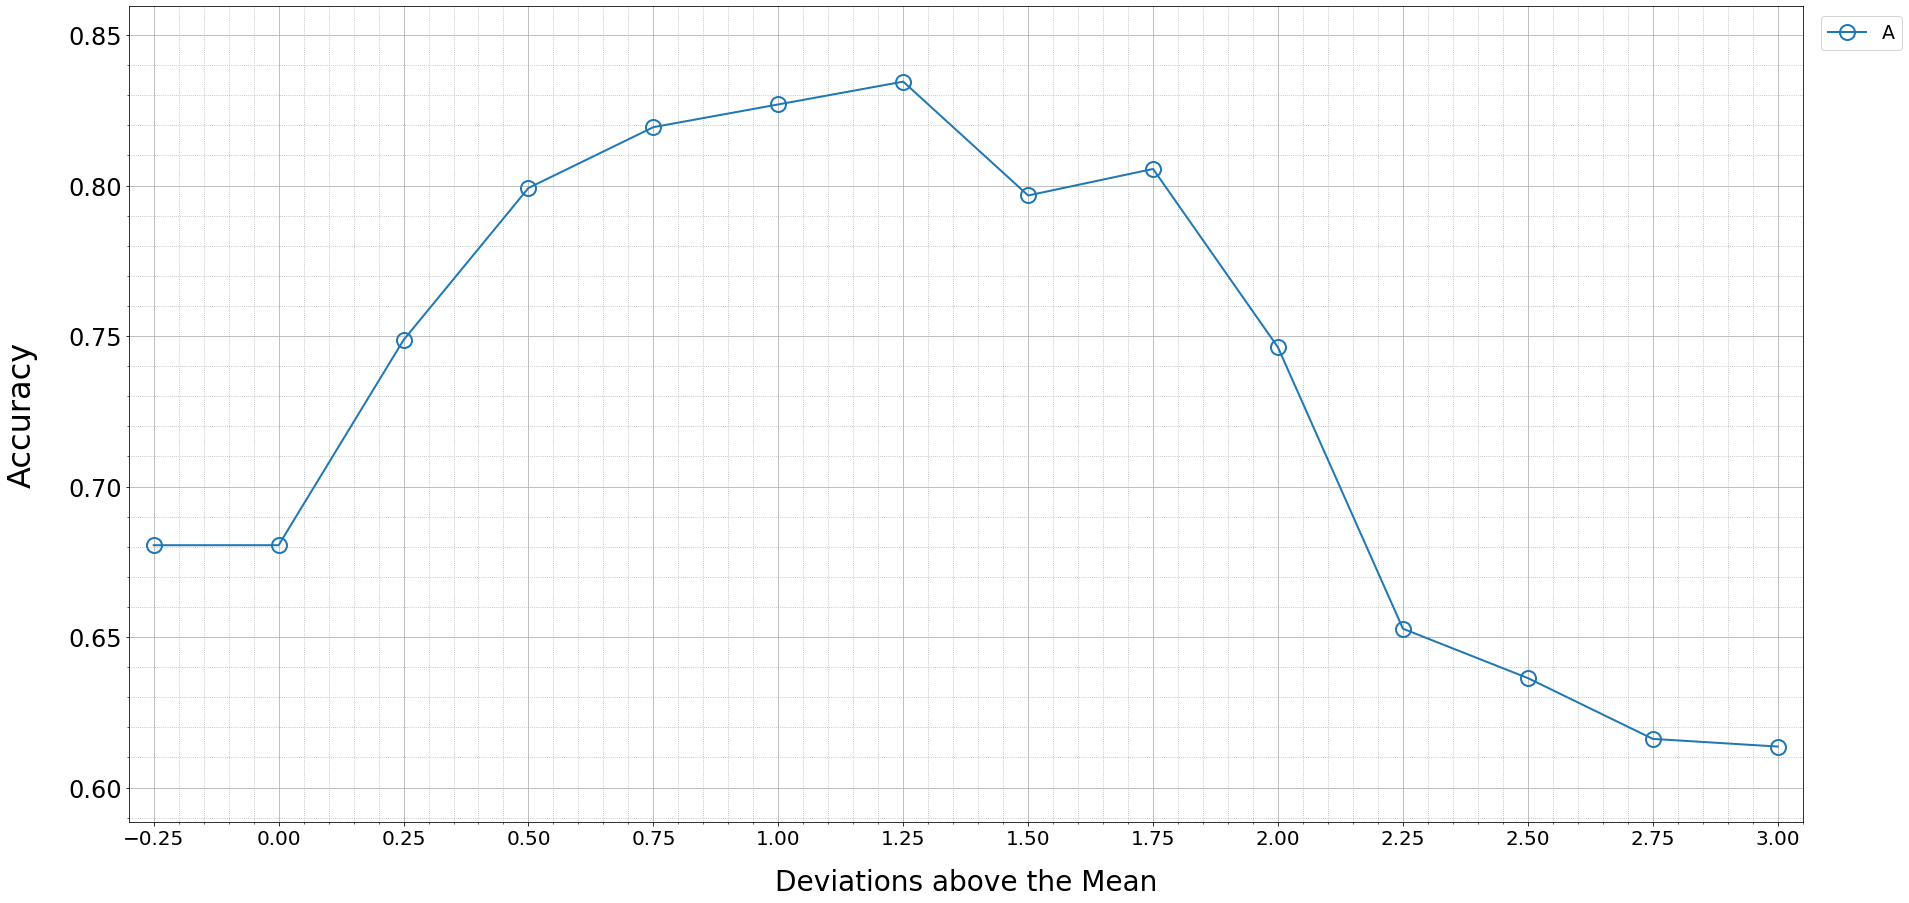

In [47]:
roget_reduced_acc = fr.plot_exhausted_all(roget_exh, markersize=15)

### WordNet

In [48]:
wn_exh, wn_rw = fr.reduce_features_all(wordnet_weights, "WordNet", og_acc=wordnet_acc)

WordNet exhausted at 8.0 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,1.25,0.968458,4672.0
Average,1.25,0.968458,4672.0


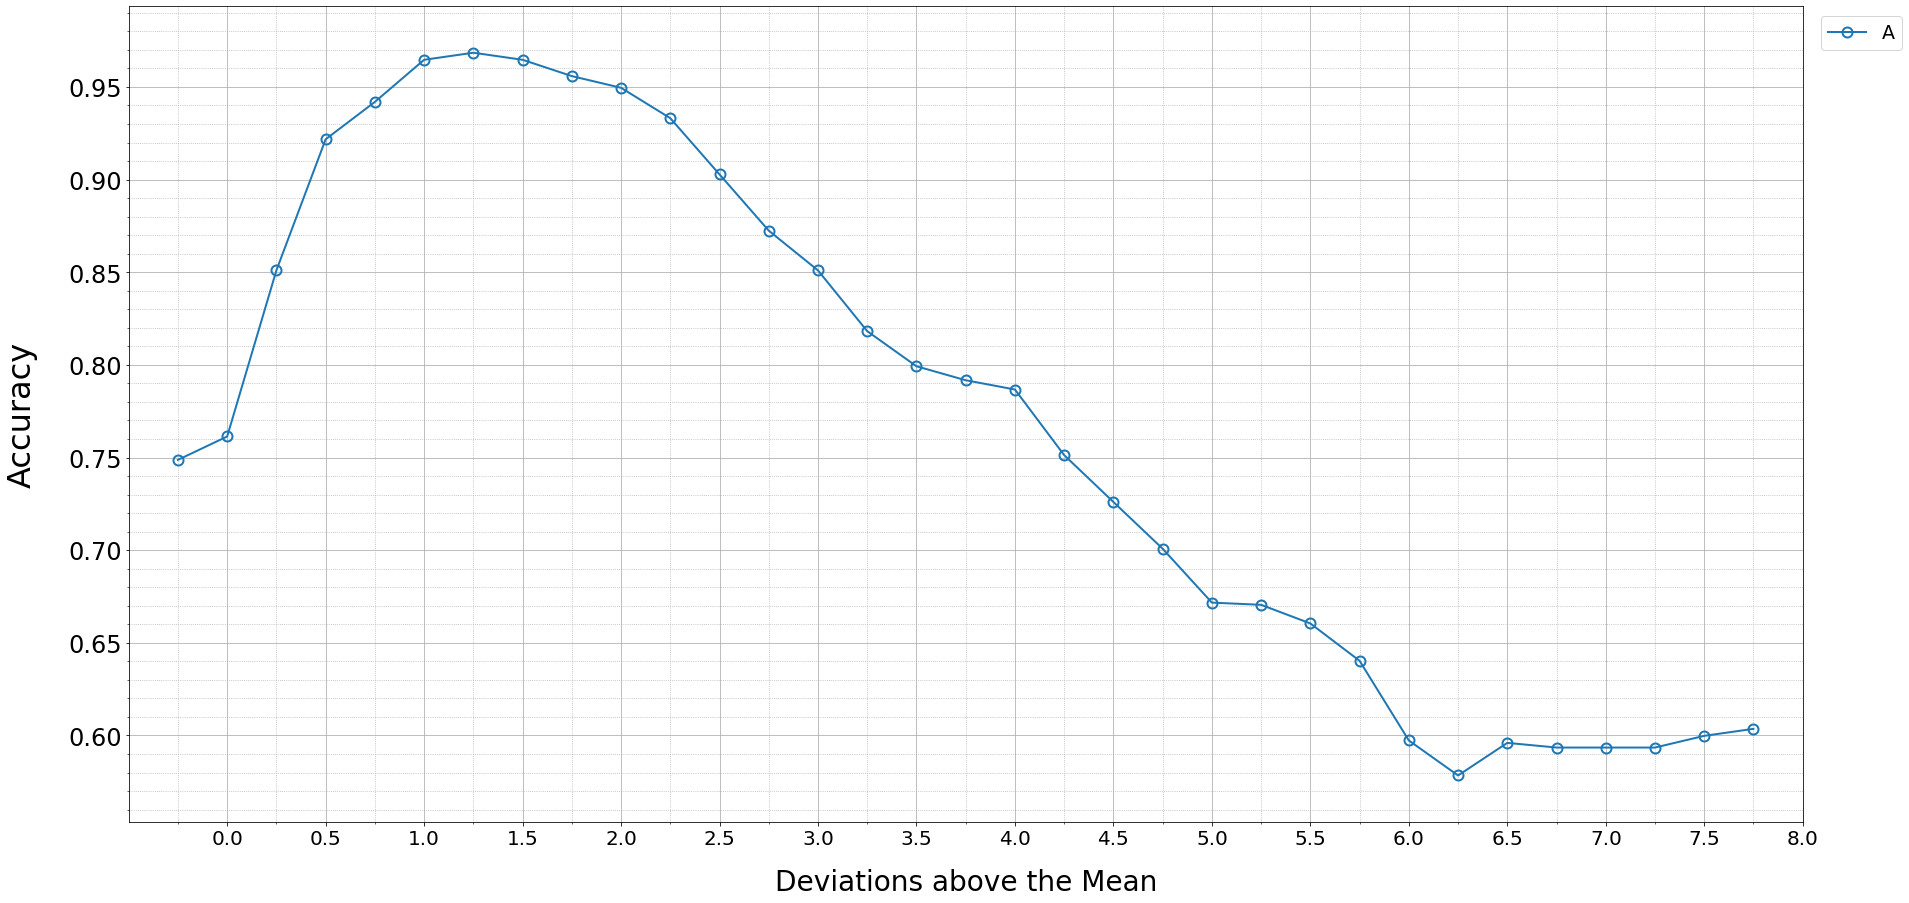

In [49]:
wn_reduced_acc = fr.plot_exhausted_all(wn_exh)

### LIWC

In [50]:
liwc_exh, liwc_weights_reduced = fr.reduce_features_all(liwc_weights, "LIWC", og_acc=liwc_acc)

LIWC exhausted at 1.25 deviations above the mean



Genre,Deviations,Accuracy,Num Features
All,0.5,0.579532,9.0
Average,0.5,0.579532,9.0


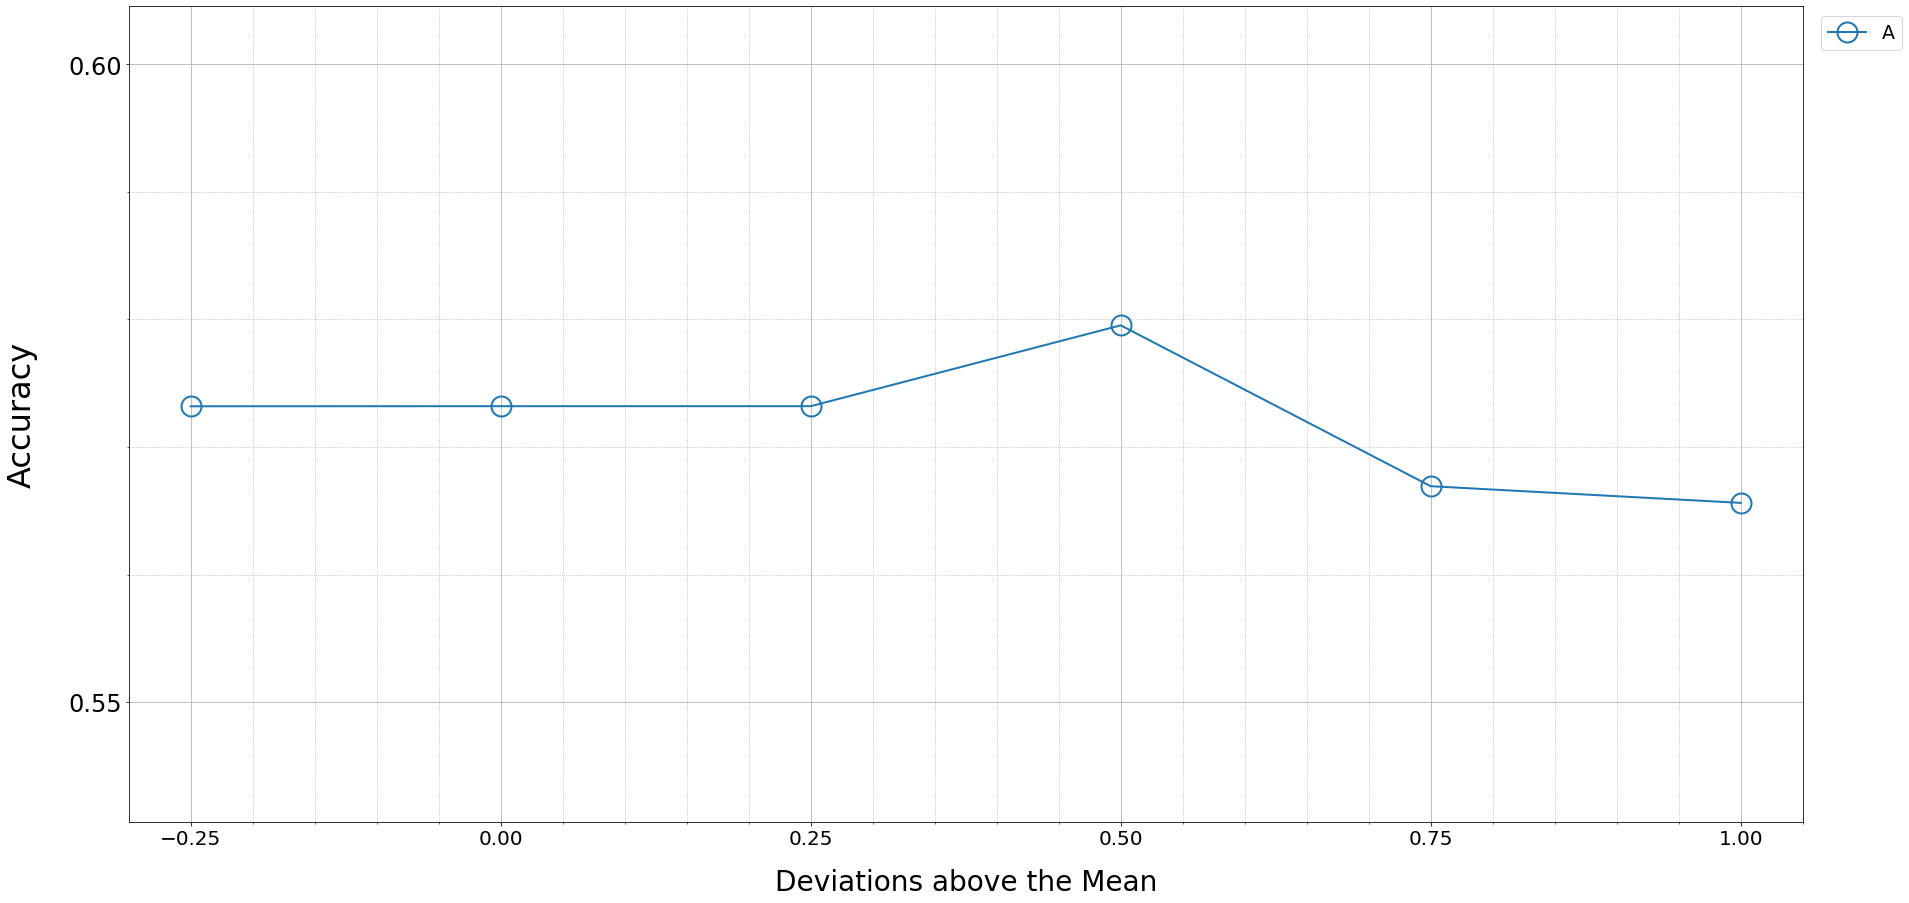

In [51]:
liwc_reduced_acc = fr.plot_exhausted_all(liwc_exh, markersize=20)

# Comparison Plot

In [52]:
# reduced_accs = [uni_reduced_acc, bi_reduced_acc, pos_reduced_acc, lex_reduced_acc, lexg_reduced_acc,
#                 nonlex_reduced_acc, nonlexg_reduced_acc, roget_reduced_acc, wn_reduced_acc, liwc_reduced_acc]

# comp_colors = create_cmap(plt.cm.tab10, [acc["Model Name"].unique()[0] for acc in no_reduc_accs[:-1]])
# markers = ["o", "x", "D", "P", "*", "H", "p", "<", ">", "^", "h"]

# fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(30,15))

# for nored_acc, red_acc, m in zip(no_reduc_accs[:-1], reduced_accs, markers):
#     nored_model_name = nored_acc["Model Name"].unique()[0]
#     red_model_name = nored_model_name + "_Reduced"
#     red_acc[red_acc["Genre"] != "Average"].plot(x="Genre", y="Accuracy", ax=axes, rot=0,
#                                                       color=comp_colors[nored_model_name], marker=m,
#                                                       markersize=20, markeredgewidth=3, fillstyle="none",
#                                                       linewidth=3, label=red_model_name)

# for nored_acc, red_acc, m in zip(no_reduc_accs[:-1], reduced_accs, markers):
#     nored_model_name = nored_acc["Model Name"].unique()[0]
#     red_model_name = nored_model_name + "_Reduced"
#     nored_acc[nored_acc["Genre"] != "Average"].plot(x="Genre", y="Accuracy", ax=axes, rot=0,
#                                                     color=comp_colors[nored_model_name], marker=m,
#                                                     markersize=20, markeredgewidth=2, fillstyle="none",
#                                                     linewidth=2, alpha=0.65)

# setup_axis(axes, x_ticklabels=NEW_GENRES, ylabel="Accuracy", minor_grid=":")

# axes.legend([acc["Model Name"].unique()[0] + "_Reduced" for acc in no_reduc_accs[:-1]] + [acc["Model Name"].unique()[0] for acc in no_reduc_accs[:-1]],
#             bbox_to_anchor=(1, 0.95), fontsize=19, ncol=2)
# plt.margins(x=0.01, y=0.05)
# plt.show()